In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family= font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 티켓값 인상에 따른 관람객 수 변화

In [3]:
final = pd.read_csv("data/월별관람객수.csv", index_col=[0])
final.head()

,관람객수
년월,
2008-01,12851835
2008-02,12845088
2008-03,9606955
2008-04,7330006
2008-05,12870573


Text(135, 200, '14000원')

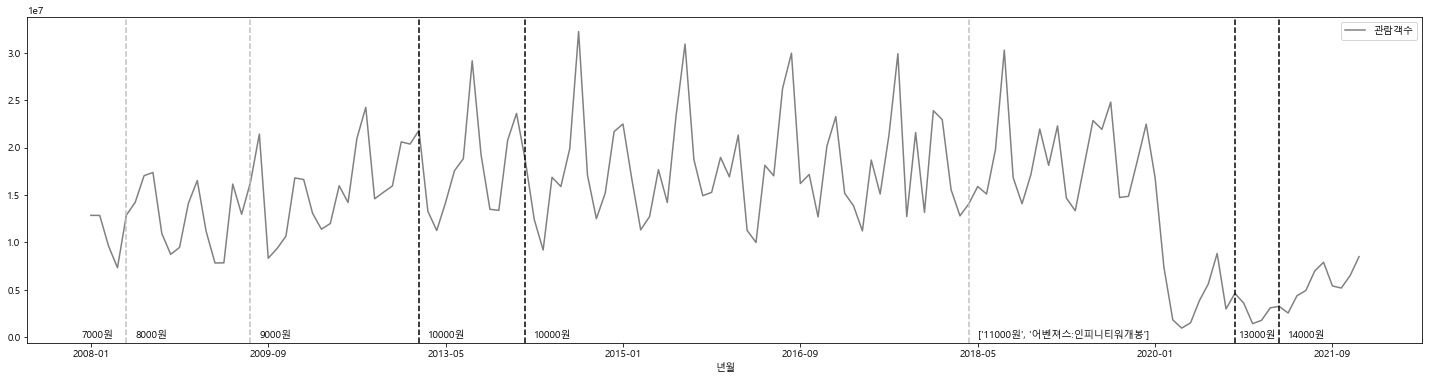

In [119]:
final.plot(color = "gray", figsize = (25,6))
plt.axvline(x=4, color = "silver", linestyle = "--")
plt.axvline(x=18, color = "silver", linestyle = "--")
plt.axvline(x=37, color = "black", linestyle = "--")
plt.axvline(x=49, color = "black", linestyle = "--") # 시간대를 더 나눠서 프라임 시간대 가격을 올림
#plt.axvline(x=75, color = "r") >> 가격이 오르지는 않고 가격 체계가 바뀜
plt.axvline(x=99, color = "silver", linestyle = "--")
plt.axvline(x=129, color = "black", linestyle = "--")
plt.axvline(x=134, color = "black", linestyle = "--")

plt.text(-1, 200, "7000원")
plt.text(5, 200, "8000원")
plt.text(19,200, "9000원")
plt.text(38, 200, "10000원")
plt.text(50, 0, "10000원")
plt.text(100,200, ["11000원","어벤져스:인피니티워개봉"])
plt.text(129.5, 200, "13000원")
plt.text(135, 200, "14000원")

# 주말 2D가격 기준
# 2000.12월 6000 >7000원,
# 2008.5월 8000원
# 2009.7월 9000원
# 2013.2월 10000원
# 2014.2월 10000원(2D, 3D차등제 실시)
# 2016.4월 11000원(프라임존), 스탠다드 10000원 그대로
# 2018.4월 12000원(프라임존), 스탠다드 11000원(1000원 인상)
# 2020.10월 13000원(좌석 차등제 폐지)
# 2021.3월 14000원

# 가격이 10000원이 넘어간 이후 가격이 오를 때마다 관객수가 떨어짐
# 2018년 4월에는 가격이 떨어짐에도 불구하고 오른 관객수가 증가했는데
    # 이때는 '어벤져스:인피니티워'가 개봉한 달로 특수 상황이라고 볼 수 있다.

## 코로나 확진자 수와 영화관람객수 추이 확인

In [9]:
number = pd.read_csv("data/영화코로나.csv")
number.head()
number.describe()
# number[(number["관람객수"]>=4000000)&(number["covid"]>=14000)]
# number[(number["관람객수"]<=4000000)&(number["covid"]<=14000)]
number.sort_values(by="covid")
#코로나 수가 비슷한 데 인식이 달라져서 관람객 수가 달라졌다 

,년월,관람객수,covid
2,2020-05,1526236,703.0
1,2020-04,972572,1241.0
3,2020-06,3864533,1385.0
4,2020-07,5618701,1509.0
7,2020-10,4633609,2864.0
6,2020-09,2988647,4051.0
0,2020-03,1834722,5560.0
5,2020-08,8834699,5685.0
8,2020-11,3595310,8219.0
11,2021-02,3111920,11827.0


<AxesSubplot:xlabel='년월'>

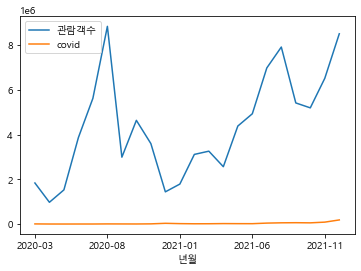

In [9]:
number = number.set_index("년월")
number.plot()

<AxesSubplot:xlabel='년월'>

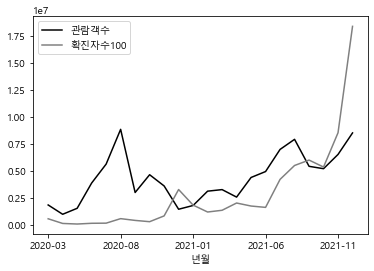

In [11]:
number["확진자수100"] = number["covid"]*100
number[["관람객수","확진자수100"]].plot(color = {"관람객수":"black", "확진자수100":"gray"})

In [51]:
len(number)
corona = number["확진자수100"][0:21]
corona.index = number.index[1:22]
movie = number["관람객수"][1:22]
number2 = pd.DataFrame({"이번달관람객수":movie, "지난달확진자수(100배)":corona})
number2

,이번달관람객수,지난달확진자수(100배)
년월,,
2020-04,972572,556000.0
2020-05,1526236,124100.0
2020-06,3864533,70300.0
2020-07,5618701,138500.0
2020-08,8834699,150900.0
2020-09,2988647,568500.0
2020-10,4633609,405100.0
2020-11,3595310,286400.0
2020-12,1438873,821900.0


Text(13, 200, '14000원')

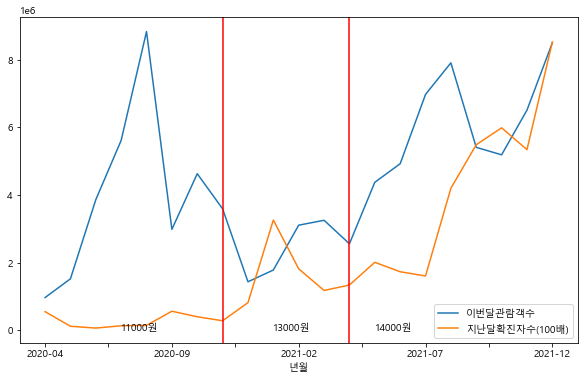

In [57]:
number2.plot(figsize=(10,6))
plt.axvline(x=7, color = "r")
plt.axvline(x=12, color = "r")
plt.text(3, 5, "11000원")
plt.text(9, 200, "13000원")
plt.text(13,200, "14000원")

Text(15, 200, '14000원')

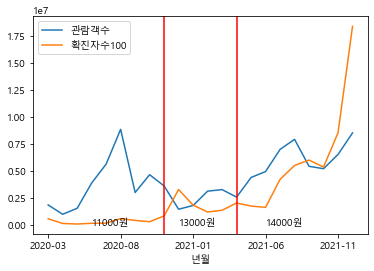

In [39]:
number["확진자수100"] = number["covid"]*100
number[["관람객수","확진자수100"]].plot()
plt.axvline(x=8, color = "r")
plt.axvline(x=13, color = "r")
plt.text(3, 5, "11000원")
plt.text(9, 200, "13000원")
plt.text(15,200, "14000원")


# 코로나 기간동안 티켓값 인상 때를 표시했습니다. 

## 확진자수 증감률과 관람객수 증감률 관계확인

In [6]:
rate1 = pd.read_csv("data/전국증감률.csv")
rate1.head()


,확진자수증감,관람객수증감
0,0.000000,0.000000
1,-0.776799,-0.469908
2,-0.433521,0.569278
3,0.970128,1.532068
4,0.089531,0.453915


<AxesSubplot:xlabel='년월'>

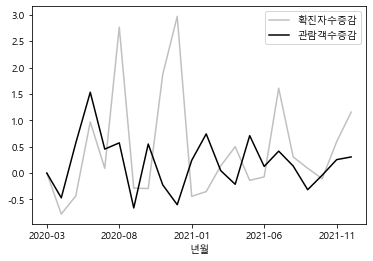

In [12]:
rate1.index = number.index
rate1.plot(color = {"확진자수증감":"silver", "관람객수증감":"black"})

### 코로나 확진자 수 증감이 다음달 영화관람에 영향을 미치는지 확인

In [13]:
effect = pd.read_csv("data/다음달영향.csv")
effect.head()

,확진자수증감,관람객수증감
0,0.000000,-0.469908
1,-0.776799,0.569278
2,-0.433521,1.532068
3,0.970128,0.453915
4,0.089531,0.572374


In [14]:
patient = rate1["확진자수증감"][0:21]
client = rate1["관람객수증감"][1:22]
patient.index = rate1.index[1:]

In [53]:
effect_final = pd.DataFrame({"확진자수증감":patient, "관람객수증감":client})
effect_final.columns = ["지난달확진자수증감률","이번달관람객수증감률"]
effect_final

,지난달확진자수증감률,이번달관람객수증감률
년월,,
2020-04,0.000000,-0.469908
2020-05,-0.776799,0.569278
2020-06,-0.433521,1.532068
2020-07,0.970128,0.453915
2020-08,0.089531,0.572374
2020-09,2.767396,-0.661715
2020-10,-0.287423,0.550404
2020-11,-0.293014,-0.224080
2020-12,1.869763,-0.599792


In [54]:
final.index

Index(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10',
       ...
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12'],
      dtype='object', name='년월', length=144)

In [55]:
effect_final.index = number.index[1:]
effect_final

,지난달확진자수증감률,이번달관람객수증감률
년월,,
2020-04,0.000000,-0.469908
2020-05,-0.776799,0.569278
2020-06,-0.433521,1.532068
2020-07,0.970128,0.453915
2020-08,0.089531,0.572374
2020-09,2.767396,-0.661715
2020-10,-0.287423,0.550404
2020-11,-0.293014,-0.224080
2020-12,1.869763,-0.599792


<AxesSubplot:xlabel='년월'>

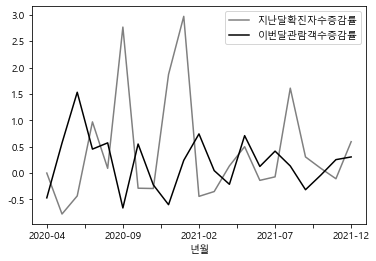

In [56]:
effect_final.plot(color = {"지난달확진자수증감률":"gray", "이번달관람객수증감률":"black"})

In [57]:
effect_final["차이"] = abs(effect_final["지난달확진자수증감률"]-effect_final["이번달관람객수증감률"])
effect_final.sort_values(by="차이", ascending=False).head()

,지난달확진자수증감률,이번달관람객수증감률,차이
년월,,,
2020-09,2.767396,-0.661715,3.429111
2021-01,2.971043,0.241331,2.729712
2020-12,1.869763,-0.599792,2.469554
2020-06,-0.433521,1.532068,1.965589
2021-08,1.609411,0.133826,1.475585


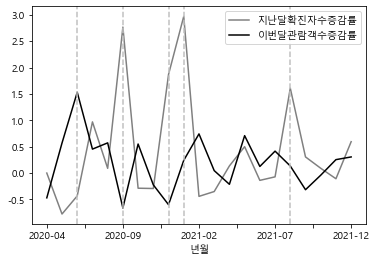

In [58]:
effect_final[["지난달확진자수증감률","이번달관람객수증감률"]].plot(color = {"지난달확진자수증감률":"gray", "이번달관람객수증감률":"black"})
plt.axvline(x=2, color = "silver", linestyle = "--")
plt.axvline(x= 5 , color = "silver", linestyle = "--")
plt.axvline(x= 9, color = "silver", linestyle = "--")
plt.axvline(x= 8, color = "silver", linestyle = "--")
plt.axvline(x= 16, color = "silver", linestyle = "--")
# top5만 표시

### 상관관계는 통계처리2.html참고!

# 그래프 수정내용

## OTT서비스를 이용한 영화시청증가율과 예능/오락시청증가율

In [21]:
OTT = pd.read_excel("가장많이이용하는OTT서비스_20-21.xlsx", header=[0,1], index_col=[0,1])
OTT.head()

C:\Users\gyeoa\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


구분별(2)        2020                                                         \
구분별(2)     사례수 (명) TV 방송 프로그램 (VOD/다시보기) (%) 해외 TV 방송 프로그램 (%) 실시간 TV (%)   
전체 소계       7434.0                      57.0               5.3       24.5   
성별 남        3872.0                      54.9               5.5       24.9   
   여        3562.0                      59.2               4.9       24.0   
연령 만10대미만    173.0                      24.9               0.0       12.3   
   만10-19세   825.0                      48.6               2.6       18.3   

구분별(2)                                                                        \
구분별(2)     영화 (%) OTT 사업자 자체 제작 프로그램(넷플릭스 오리지널 등) (%) 예능/오락(개인방송 콘텐츠 포함) (%)   
전체 소계        22.3                                19.8                   73.1   
성별 남         23.9                                20.4                   75.2   
   여         20.6                                19.1                   70.8   
연령 만10대미만     3.2                                 9.7                   85.7   
   만10-19세   15.9                                12.9                   79.6   

구분별(2)                      2021                                        \
구분별(2)     음악 (%) 기타 (%) 사례수 (명) 영화 (%) 예능/오락(개인방송 콘텐츠 포함) (%) 드라마 (%)   
전체 소계        32.1    0.3  8293.7   38.5                   80.5    47.0   
성별 남         30.3    0.4  4283.5   37.4                   78.6    33.2   
   여         34.1    0.3  4010.2   39.8                   82.5    61.7   
연령 만10대미만    19.8    1.0   174.5    8.1                   71.3     7.1   
   만10-19세   40.4    0.9   880.1   30.7                   88.8    31.1   

구분별(2)                                                                 
구분별(2)     교양/다큐멘터리 (%) 교육/학습 (%) 애니메이션(만화) (%) 스포츠 (%) 뉴스 (%) 기타 (%)  
전체 소계              19.6       9.2          10.2    23.4   25.8    2.0  
성별 남               20.6       8.4           9.3    39.9   29.7    1.7  
   여               18.6      10.1          11.2     5.8   21.6    2.2  
연령 만10대미만           9.3      41.8          72.9     0.3    0.9    0.0  
   만10-19세         12.4      36.1          39.1     9.9    5.1    1.6

In [22]:
OTT.columns =[["2020","2020","2020","2020","2020","2020","2020","2020","2020","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021"], ["사례수","국내TV", "해외TV", "실시간TV", "영화", "OTT자체제작", "개인방송(예능/오락)", "음악", "기타","사례수", "영화", "개인방송(예능/오락)", "드라마","교양/다큐","교육/학습","애니메이션","스포츠","뉴스","기타"]]
OTT.head()

2020                                                        \
               사례수  국내TV 해외TV 실시간TV    영화 OTT자체제작 개인방송(예능/오락)    음악   기타   
전체 소계       7434.0  57.0  5.3  24.5  22.3    19.8        73.1  32.1  0.3   
성별 남        3872.0  54.9  5.5  24.9  23.9    20.4        75.2  30.3  0.4   
   여        3562.0  59.2  4.9  24.0  20.6    19.1        70.8  34.1  0.3   
연령 만10대미만    173.0  24.9  0.0  12.3   3.2     9.7        85.7  19.8  1.0   
   만10-19세   825.0  48.6  2.6  18.3  15.9    12.9        79.6  40.4  0.9   

              2021                                                             
               사례수    영화 개인방송(예능/오락)   드라마 교양/다큐 교육/학습 애니메이션   스포츠    뉴스   기타  
전체 소계       8293.7  38.5        80.5  47.0  19.6   9.2  10.2  23.4  25.8  2.0  
성별 남        4283.5  37.4        78.6  33.2  20.6   8.4   9.3  39.9  29.7  1.7  
   여        4010.2  39.8        82.5  61.7  18.6  10.1  11.2   5.8  21.6  2.2  
연령 만10대미만    174.5   8.1        71.3   7.1   9.3  41.8  72.9   0.3   0.9  0.0  
   만10-19세   880.1  30.7        88.8  31.1  12.4  36.1  39.1   9.9   5.1  1.6

In [23]:
OTT_movie = pd.DataFrame([OTT["2020"]["영화"], OTT["2021"]["영화"]], index=["2020","2021"]).T
OTT_movie["OTT영화시청증가율"]=(OTT_movie["2021"]-OTT_movie["2020"])/OTT_movie["2020"]*100
OTT_movie

2020  2021  OTT영화시청증가율
전체 소계       22.3  38.5   72.645740
성별 남        23.9  37.4   56.485356
   여        20.6  39.8   93.203883
연령 만10대미만    3.2   8.1  153.125000
   만10-19세  15.9  30.7   93.081761
   만20-29세  34.8  61.5   76.724138
   만30-39세  30.6  46.9   53.267974
   만40-49세  23.6  45.1   91.101695
   만50-59세  14.8  29.8  101.351351
   만60-69세   7.9  18.1  129.113924
   만70세이상    3.5  13.5  285.714286

In [33]:
# OTT시청의 증감률을 확인하고 우리가 알아보고자 하는 OTT에서 영화를 보는 시청 증감률이 차이를 비교하기 위해 dataframe을 합쳐준다
# 추가로 2020년과 2021년의 공통 컬럼인 예능/오락부분도 추가해서 비교하겠다.
# 개인방송이 주가 아니라 예능/오락이 주 인것 같아서 예능/오락으로 바꾸면 좋을 것 같습니다. 

In [24]:
OTT_개인방송 = pd.DataFrame([OTT["2020"]["개인방송(예능/오락)"], OTT["2021"]["개인방송(예능/오락)"]], index=["2020","2021"]).T
OTT_개인방송["OTT개인방송시청증가율"]=(OTT_개인방송["2021"]-OTT_개인방송["2020"])/OTT_개인방송["2020"]*100
OTT_개인방송

2020  2021  OTT개인방송시청증가율
전체 소계       73.1  80.5     10.123119
성별 남        75.2  78.6      4.521277
   여        70.8  82.5     16.525424
연령 만10대미만   85.7  71.3    -16.802800
   만10-19세  79.6  88.8     11.557789
   만20-29세  73.7  88.7     20.352782
   만30-39세  69.6  86.4     24.137931
   만40-49세  69.2  79.8     15.317919
   만50-59세  73.9  75.2      1.759134
   만60-69세  74.4  69.6     -6.451613
   만70세이상   76.0  64.2    -15.526316

In [25]:
change = pd.concat([OTT_movie["OTT영화시청증가율"], OTT_개인방송["OTT개인방송시청증가율"]], axis=1)
change.columns = ["OTT영화시청증가율", "OTT예능/오락시청증가율"]
change

OTT영화시청증가율  OTT예능/오락시청증가율
전체 소계        72.645740      10.123119
성별 남         56.485356       4.521277
   여         93.203883      16.525424
연령 만10대미만   153.125000     -16.802800
   만10-19세   93.081761      11.557789
   만20-29세   76.724138      20.352782
   만30-39세   53.267974      24.137931
   만40-49세   91.101695      15.317919
   만50-59세  101.351351       1.759134
   만60-69세  129.113924      -6.451613
   만70세이상   285.714286     -15.526316

In [26]:
change = change.astype(int)
change = change.droplevel(level=0, axis=0)
change.columns.names = ["장르"]
change = change.rename(index = {"소계" : "전체"})
change.head()

장르,OTT영화시청증가율,OTT예능/오락시청증가율
전체,72,10
남,56,4
여,93,16
만10대미만,153,-16
만10-19세,93,11


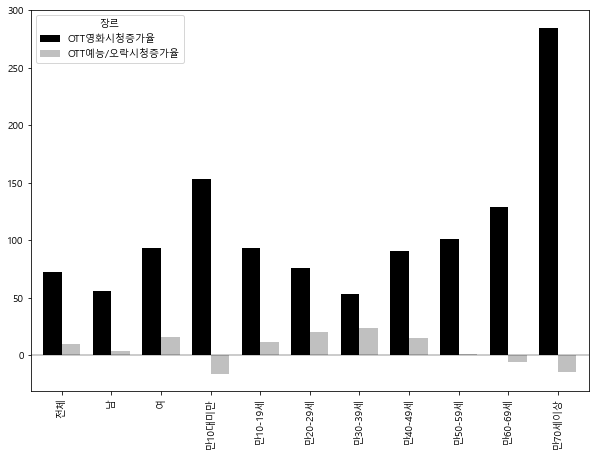

In [51]:
ax = change.plot(kind = "bar", color = {"OTT영화시청증가율":"black", "OTT예능/오락시청증가율":"silver"}, figsize = (10,7), width = 0.75)
plt.axhline(y=0, color = "black", linewidth = 0.4)
# line = plt.plot(change)
# plt.setp(line, color="gray", linestyle="--")

## 여가시간 영화관 이용률 변화

In [11]:
import pandas as pd
sparemovie= pd.read_csv("1년동안가장많이이용한여가공간1순위_영화관비율.csv", encoding="euc-kr", header=[0,1], index_col=[0,1])
sparemovie.head()

통계분류(1)     2016  2018  2019 2020 2021
통계분류(1)      영화관   영화관   영화관  영화관  영화관
전체  소계       4.4   6.8   9.4    3  2.1
성별  남성       4.2   6.1   8.9    3  2.1
    여성       4.6   7.5   9.9    3    2
연령별 15~19세   7.3  10.3  17.3  6.1  4.4
    20대     10.1  12.6  16.5  6.2    4

In [12]:
#위의 OTT 시청자 구분 맞춰주기(전체, 성별, 연령별)

sparetheater = sparemovie.loc[["전체","성별","연령별"],["2019","2021"]]

In [3]:
sparetheater.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('전체', '소계') to ('연령별', '70세이상')
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   (2019, 영화관)  10 non-null     object
 1   (2021, 영화관)  10 non-null     object
dtypes: object(2)
memory usage: 3.4+ KB


In [13]:
sparetheater = sparetheater.astype(float)
sparetheater = sparetheater.astype(int)
sparetheater = sparetheater.droplevel(level=1, axis=1)
sparetheater = sparetheater.droplevel(level=0, axis=0)
sparetheater.columns.names = ["연도"]
sparetheater.head()

연도,2019,2021
소계,9,2
남성,8,2
여성,9,2
15~19세,17,4
20대,16,4


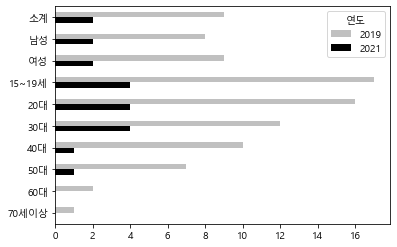

In [14]:
ax = sparetheater.plot(kind = "barh", color = {"2019":"silver", "2021":"black"})
ax.invert_yaxis()

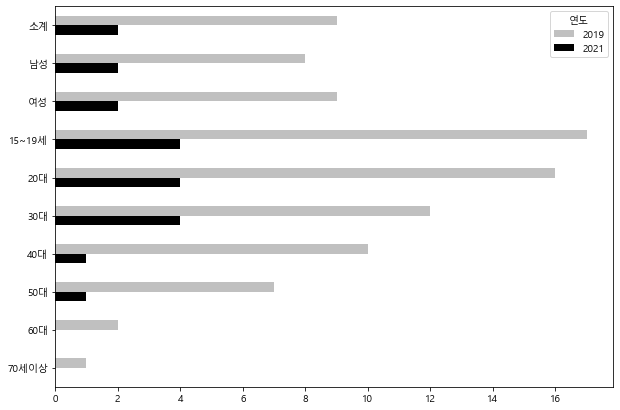

In [15]:
ax = sparetheater.plot(kind = "barh", color = {"2019":"silver", "2021":"black"}, figsize = (10,7))
ax.invert_yaxis()

## 영화 관객수 증가 비율

In [60]:
movietheater = pd.read_excel("영화관객수및매출액_2018-2022.xlsx", header=[0,1], index_col=[0])

In [61]:
theater = pd.DataFrame(movietheater["전체"]["관객수"])

In [62]:
theater_graph = theater.iloc[:-1]
theater_graph_2021 = theater.iloc[:-2]
theater_graph

,관객수
2018,216385269
2019,226678777
2020,59523967
2021,60531087
2022,92501405


In [87]:
theater_graph = theater.iloc[:-1]
theater_graph_2021 = theater.iloc[:-2]
theater_graph_2021

,관객수
2018,216385269
2019,226678777
2020,59523967
2021,60531087


<AxesSubplot:>

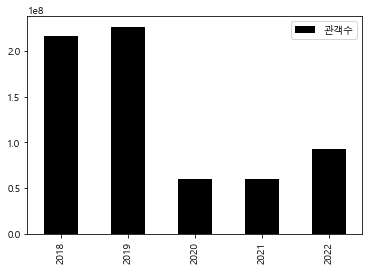

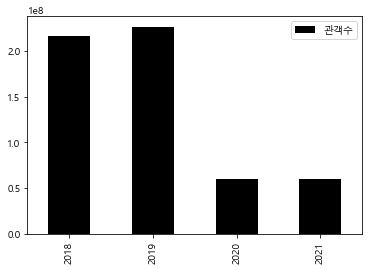

In [83]:
theater_graph.plot(kind = "bar", color = "black")
theater_graph_2021.plot(kind = "bar", color = "black")

Text(0, 0.5, '관객수')

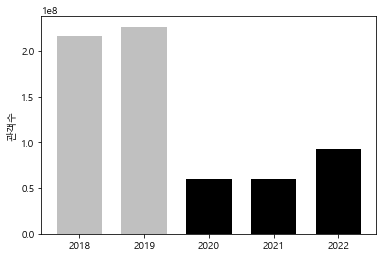

In [99]:
plt.figure(figsize=(6,4)) 
colors = ["silver",'silver','black','black','black']
plt.bar(theater_graph.index, theater_graph["관객수"], color=colors, width = 0.7)
plt.ylabel('관객수')

Text(0, 0.5, '관객수')

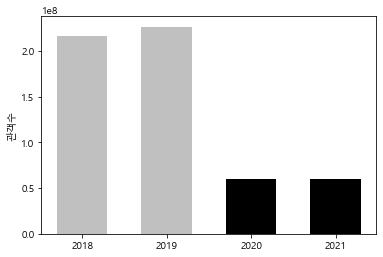

In [111]:
plt.figure(figsize=(6,4)) 
colors = ["silver",'silver','black','black']
x = ["2018", "2019", "2020", "2021"]
plt.bar(x, theater_graph_2021["관객수"], color=colors, width = 0.6)
plt.ylabel('관객수')

## 해외 OTT서비스 비가입이유

In [3]:
import pandas as pd
reason = pd.read_csv("해외유료OTT서비스비가입이유.csv", encoding="euc-kr", index_col=[0,1,2,3,4])
reason

,,,,,사례수(명),이용요금이비싸서(비율),특별히볼만한재미있고좋은콘텐츠가없어서(비율),지상파TV나유료방송으로도충분해서(비율),온라인동영상서비스(OTT)가만족스럽지않아서(비율),가입방법을잘몰라서(비율),이용방법을잘몰라서(비율),콘텐츠품질이떨어져서(비율),자녀들에게부정적인영향을미칠것같아서(비율),외국서비스를이용하는것을좋아하지않아서(비율)
연번,조사연도,국가,분류,구분,,,,,,,,,,
1,2020,영국,국가별,전체,66,30.3,6.1,28.8,1.5,1.5,9.1,0.0,3.0,6.1
2,2020,호주,국가별,전체,118,24.6,3.4,29.7,2.5,5.1,7.6,0.8,1.7,7.6
3,2020,러시아,국가별,전체,59,28.8,8.5,32.2,1.7,5.1,6.8,1.7,0.0,1.7
4,2020,브라질,국가별,전체,56,25.0,3.6,19.6,5.4,14.3,10.7,0.0,1.8,3.6
5,2020,UAE,국가별,전체,55,14.5,9.1,16.4,3.6,12.7,9.1,5.5,3.6,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020,러시아,소득별,평균 이상,8,37.5,0.0,25.0,12.5,12.5,0.0,0.0,0.0,12.5
92,2020,브라질,소득별,평균 이하,19,26.3,10.5,21.1,10.5,15.8,0.0,0.0,5.3,0.0
93,2020,브라질,소득별,평균 이상,13,7.7,0.0,30.8,0.0,23.1,7.7,0.0,0.0,15.4


In [4]:
reason1 = reason.iloc[0:5].droplevel(["연번","조사연도","분류", "구분"]).T
reason1

국가,영국,호주,러시아,브라질,UAE
사례수(명),66.0,118.0,59.0,56.0,55.0
이용요금이비싸서(비율),30.3,24.6,28.8,25.0,14.5
특별히볼만한재미있고좋은콘텐츠가없어서(비율),6.1,3.4,8.5,3.6,9.1
지상파TV나유료방송으로도충분해서(비율),28.8,29.7,32.2,19.6,16.4
온라인동영상서비스(OTT)가만족스럽지않아서(비율),1.5,2.5,1.7,5.4,3.6
가입방법을잘몰라서(비율),1.5,5.1,5.1,14.3,12.7
이용방법을잘몰라서(비율),9.1,7.6,6.8,10.7,9.1
콘텐츠품질이떨어져서(비율),0.0,0.8,1.7,0.0,5.5
자녀들에게부정적인영향을미칠것같아서(비율),3.0,1.7,0.0,1.8,3.6
외국서비스를이용하는것을좋아하지않아서(비율),6.1,7.6,1.7,3.6,12.7


In [5]:
England = reason1.sort_values("영국", ascending=False)["영국"].head(6)
Austrailia = reason1.sort_values("호주", ascending=False)["호주"].head(6)
Russia = reason1.sort_values("러시아", ascending=False)["러시아"].head(6)
Brazil = reason1.sort_values("브라질", ascending=False)["브라질"].head(6)
UAE = reason1.sort_values("UAE", ascending=False)["UAE"].head(6)

list1 = [England, Austrailia, Russia, Brazil, UAE]

reasontotal = pd.concat(list1, axis=1)
reasontotal

,영국,호주,러시아,브라질,UAE
사례수(명),66.0,118.0,59.0,56.0,55.0
이용요금이비싸서(비율),30.3,24.6,28.8,25.0,14.5
지상파TV나유료방송으로도충분해서(비율),28.8,29.7,32.2,19.6,16.4
이용방법을잘몰라서(비율),9.1,7.6,6.8,10.7,NaN
특별히볼만한재미있고좋은콘텐츠가없어서(비율),6.1,NaN,8.5,NaN,9.1
외국서비스를이용하는것을좋아하지않아서(비율),6.1,7.6,NaN,NaN,12.7
가입방법을잘몰라서(비율),NaN,5.1,5.1,14.3,12.7
온라인동영상서비스(OTT)가만족스럽지않아서(비율),NaN,NaN,NaN,5.4,NaN


영국과 브라질에서는 이용요금이 비싸서라는 이유가 가장 높음 

다른 나라의 경우 지상파TV나 유료방송으로도 충분해서라는 비율이 가장 높고 그 다음이 
이용요금이 비싸서라는 이유지만
사실 둘의 차이는 크지 않다고 생각된다.
(어쨌든 추가로 돈을 지불하면서까지 OTT서비스를 이용할 필요성을 못 느끼는 것)

In [6]:
reason_graph = reasontotal.drop(index = "사례수(명)" )
reason_graph = reason_graph[["영국","러시아","브라질","호주","UAE"]]

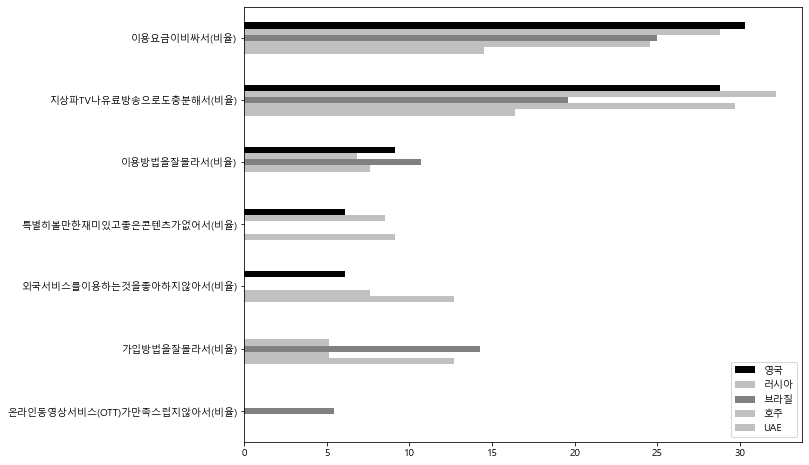

In [15]:
ax = reason_graph.plot(kind = "barh", color = {"영국":"black","러시아":"silver","브라질":"gray","호주":"silver","UAE":"silver"}, figsize = (10,8))
ax.invert_yaxis()


## OTT서비스관련 어플리케이션을 자주 이용하는 사람들의 비율 증가 확인

,2017,2018,2019,2020,2021
만10대미만,39.80,53.3000,54.7000,42.3000,35.8000
만10-19세,24.40,35.7000,32.2000,37.1000,42.8000
만20-29세,15.80,22.1000,20.3000,39.5000,45.5000
만30-39세,10.50,16.4000,14.4000,27.1000,33.6000
만40-49세,10.20,10.4000,13.1000,19.9000,30.7000
만50-59세,9.90,13.8000,12.4000,22.3000,30.8000
만60-69세,6.90,9.1000,10.5000,16.7000,29.1000
만70세이상,2.90,6.1000,15.5000,11.0000,20.6000
mean,15.05,20.8625,21.6375,26.9875,33.6125


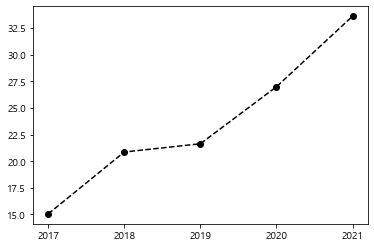

In [3]:

application = pd.read_csv("자주사용하는앱.csv", header=[0,1], index_col=[0,1])

data = {"2017" : application["2017"]["방송/동영상(OTT 서비스 등) (%)"], "2018": application["2018"]["방송/동영상(OTT 서비스 등) (%)"],"2019": application["2019"]["방송/동영상(OTT 서비스 등) (%)"],"2020": application["2020"]["방송/동영상(OTT 서비스 등) (%)"],"2021": application["2021"]["방송/동영상(OTT 서비스 등) (%)"]}
OTT_application = pd.DataFrame(data=data)

OTT_application_age = OTT_application.loc["연령"]
OTT_application_age

OTT_application_age = OTT_application_age.astype(float)
OTT_application_age.loc["mean"]=OTT_application_age.mean()

plt.plot(OTT_application_age.loc["mean"], color = "black", linestyle = "--", marker = "o")
# 다운로드 받은 앱 중 OTT관련 앱을 자주 사용하는 사람들의 비율의 평균은 계속 증가하고 있다.

OTT_application_age

## OTT서비스 이용 여부

C:\Users\gyeoa\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


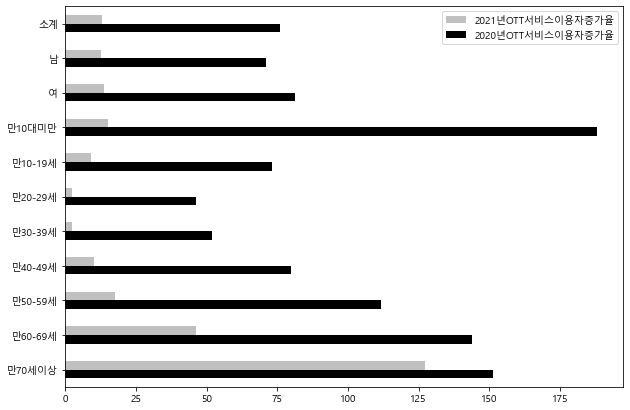

In [10]:
user = pd.read_excel("최근3개월OTT서비스이용경험.xlsx", header=[0,1], index_col=[0,1])

userincrease = pd.DataFrame({"2021년OTT서비스이용자증가율":round((user["2021"]["이용경험 있음 (%)"]-user["2020"]["이용경험 있음 (%)"])/user["2020"]["이용경험 있음 (%)"] *100,2),
                            "2020년OTT서비스이용자증가율":round((user["2020"]["이용경험 있음 (%)"]-user["2019"]["이용경험 있음 (%)"])/user["2019"]["이용경험 있음 (%)"] *100,2)})
#userincrease.columns = ["이용자증가율"]
userincrease

unserincrease_graph = userincrease.droplevel(level=0)
ax = unserincrease_graph.plot(kind = "barh", color = {"2020년OTT서비스이용자증가율":"black", "2021년OTT서비스이용자증가율":"silver"}, figsize = (10,7))
ax.invert_yaxis()


## 2020년과 2021년의 코로나에 대한 인식변화 _ word cloud

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
from konlpy.tag import Okt #형태소 분석을 위한 클래스 
from konlpy.corpus import kolaw #샘플 예제를 가져오기 위한(kolaw : 우리나라 헌법)
import nltk
from wordcloud import WordCloud #아까 import해서 안해도 되지만 처음 쓰는 경우 이걸 import해야함

In [8]:
news21 = []
list = ["https://search.naver.com/search.naver?where=news&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sm=tab_opt&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20210401to20210430&is_sug_officeid=0",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=10&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=11",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=21",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=30&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=31",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=40&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=41",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=50&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=51",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=61&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=61",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=71&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=71"]

for li in list:
    page = urlopen(li)
    soup = BeautifulSoup(page, "html.parser")
    title21 = soup.find("ul", class_ = "list_news").find_all("a", class_="news_tit")
    for i in range(int(len(title21))):
        text = title21[i].get_text()
        news21.append(text)
    
news21

['닐슨IQ 코리아, 포스트 코로나19 시대 소비 지형 변화 발표',
 '타코닉 바이오사이언스, 새로운 코로나19 마우스 모델 출시',
 '노원구서비스공단, 코로나19 백신접종센터 운영 총력',
 '코로나로 취소된 ‘양구곰취축제’, 온라인축제로 풍성',
 '알릭스파트너스, 코로나19 이후 소비자 구매 우선순위 변화상 발표',
 '코로나19 항체 치료제 국내 대량생산을 위한 국제 콘퍼런스 개최',
 '[코로나19] 이틀째 730명대 확진···예방접종은 더디기만',
 "[issue&] 코로나 사태 속에서도 적극적 인재 확보 적시적소 배치 위해 '상시 ...",
 '서울특별시립청소년활동진흥센터, ‘코로나 시대 1년, 미래 청소년 활동 전환...',
 '[비즈스토리] 코로나19 중증 고위험군 환자 대상 ‘나파벨탄’ 임상 3상 계획...',
 "스타튜브 코로나19 극복을 위한 '야한식당' 시즌1 성황리에 종료",
 '북랩, 코로나 시대 교회의 타락을 경고한 ‘종이냐 자유인이냐’ 출간',
 '코로나19 확진자 다시 700명대로···4차 대유행 시작?',
 'Momentum Labs, 코로나19 기간 글로벌 업체들 위한 최신 브랜드 인지 및 충성...',
 'PRA Health Sciences, 승인 획득한 백신과 치료제에 대한 약물감시 솔루션 통...',
 '국내 코로나19 신규확진자 671명',
 'NDS, 의료 기관 출입 번거로움 줄이는 ‘코로나 QR 출입증’ 무료 배포',
 '서울숲공원, 위드코로나 시대 틱톡과 식목일 챌린지 이벤트 진행',
 '[식음료 특집]‘건강 기능성’에 ‘편리미엄’ 더한 코로나 극복의 든든한 지...',
 '[2021 국가산업대상] 코로나19 백신·치료제에 대한 임상시험 진행',
 '[2021 국가산업대상] 개인 채무 감면, 코로나19 피해기업 투자 단행',
 '열매나눔재단, 코로나19 타격 소상공인에 1.8% 저금리 대출 지원',
 '에스엘에스바이오, 객담 검사 코로나19 항원 신속진단키트 유럽 수출 추진',
 '벼룩시장구인구직 조사: 코로

693


(-0.5, 399.5, 199.5, -0.5)

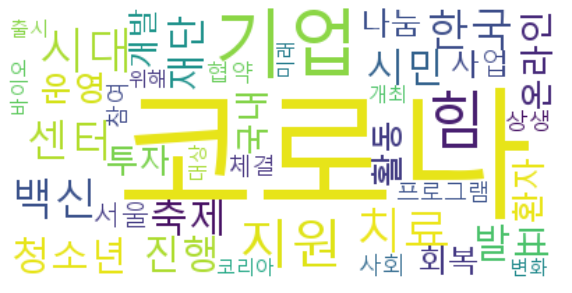

In [11]:
okt = Okt()
text21 = []
for i in range(int(len(news21))):
    noun = okt.nouns(news21[i])
    for j in noun:
        text21.append(j)
text21

#### 불용어 처리

#불용어 사전 만들기
stop_words = ["위","제","대한","명","속","명대"]

#아까는 함수가 있었지만 이건 없으므로 반복문 돌려서 매칭해서 원본에 담을 수 있게 해야 함

text21 = [each_word for each_word in text21 if each_word not in stop_words]
print(len(text21))

#### 빈도수 처리(워드 카운팅)

#nltk : 빈도를 계산해서 정렬까지 시켜주는 

ko = nltk.Text(text21, name="코로나2021뉴스")
#이름 넣어야 되는데 아무거나 지정하면 됨

#dir(ko) >> 사용할 수 있는 함수 조회

data = ko.vocab().most_common(100)
#얘는 빈도를 비율로 나타낸건 아니고 실제 counting 수 확인
data
#data = data[:10]

### 워드 클라우드 출력
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=100, background_color = "white",max_words=40, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

#stopwords쓸수 없음
#그냥 generate쓸 수 없음
#generate_from_frequencies할 때 데이터는 dict형태로 넘겨줘야 함
#원래 형식이 tuple로 되어있음

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
#image를 불러올 때 WordCloud의 recolor함수 사용해서 색깔 불러오기
plt.axis("off")

In [10]:
data  

[('코로나', 37),
 ('기업', 15),
 ('위', 10),
 ('힘', 10),
 ('지원', 7),
 ('시대', 6),
 ('치료', 6),
 ('백신', 5),
 ('센터', 5),
 ('한국', 5),
 ('발표', 4),
 ('축제', 4),
 ('청소년', 4),
 ('진행', 4),
 ('재단', 4),
 ('시민', 4),
 ('운영', 3),
 ('온라인', 3),
 ('국내', 3),
 ('활동', 3),
 ('환자', 3),
 ('투자', 3),
 ('나눔', 3),
 ('회복', 3),
 ('개발', 3),
 ('사업', 3),
 ('서울', 3),
 ('프로그램', 3),
 ('사회', 3),
 ('협약', 3),
 ('체결', 3),
 ('상생', 3),
 ('참여', 3),
 ('코리아', 2),
 ('변화', 2),
 ('바이오', 2),
 ('출시', 2),
 ('개최', 2),
 ('명대', 2),
 ('위해', 2),
 ('미래', 2),
 ('대상', 2),
 ('계획', 2),
 ('스타', 2),
 ('튜브', 2),
 ('극복', 2),
 ('성황리', 2),
 ('확', 2),
 ('진자', 2),
 ('글로벌', 2),
 ('브랜드', 2),
 ('및', 2),
 ('솔루션', 2),
 ('출입', 2),
 ('국가', 2),
 ('산업대', 2),
 ('열매', 2),
 ('상공', 2),
 ('추진', 2),
 ('길', 2),
 ('스토어', 2),
 ('활', 2),
 ('복지', 2),
 ('일자리', 2),
 ('얀', 2),
 ('문화재단', 2),
 ('청', 2),
 ('비대', 2),
 ('학생', 2),
 ('온', 2),
 ('오프라인', 2),
 ('최대', 2),
 ('실적', 2),
 ('더', 2),
 ('세계', 2),
 ('규모', 2),
 ('지속', 2),
 ('인', 2),
 ('경제', 2),
 ('업무', 2),
 ('공간', 2),
 ('활용', 2),
 ('혁신

In [12]:
news20 = []
list = ["https://search.naver.com/search.naver?where=news&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sm=tab_opt&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20201201to20201231&is_sug_officeid=0",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=10&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=11",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=21",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=30&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=31",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=40&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=41",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=50&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=51",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=60&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=61",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=70&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=71"]
for li in list:
    page = urlopen(li)
    soup = BeautifulSoup(page, "html.parser")
    title20 = soup.find("ul", class_ = "list_news").find_all("a", class_="news_tit")
    for i in range(int(len(title21))):
        text = title20[i].get_text()
        news20.append(text)
    
news20

['KMI한국의학연구소, 대한여행의학회 학술대회서 ‘코로나19’ 최신 지견 공유',
 '국가철도공단, 코로나 19에도 신규채용 270명···역대 최대규모 청년고용시...',
 '[함께하는 금융] 일산의 동양인재개발원 숙소동코로나19 생활치료센터로 제공',
 'OCT 클리니컬, 러시아 내 칸시노 코로나19 백신 임상 시험 경과 발표',
 '㈜세한, 코로나19 상황 속 국내외 기계 사업 활성화 시동',
 "[상생경영] LG그룹, 나눔으로 '코로나 위기' 이겨낸다",
 '[제약&바이오] 코로나19 혈장 치료제 ‘GC5131A’ 개발 총력···환자 치료목...',
 '퍼시스, 사회복지공동모금회에 코로나19 지원금 10억원 기부',
 '엘림넷, 2020년 코로나 팬데믹으로 온택트 멀티 플랫폼 ‘굿모임’ 부상',
 '오송사회적가치실현협의체, 코로나19 위기 극복에 동참',
 '연세대 KSCY, 코로나 시대 교육자를 위한 비대면 학술 교육 지침서 발간',
 '아스타투어, 코로나 위기 속 잇따른 ‘제휴처’ 확대로 본격 시장 선도 나선다',
 '[제약&바이오] "코로나19 치료제 선점한다" 개발 가속도 붙은 K바이오',
 '2020 제로페이, 코로나 위기 속 소상공인·소비자 ‘버팀목’… ‘재난’, ‘...',
 '신한카드, 제19회 꼬마피카소 그림대회 온라인 시상식 열어',
 "[상생경영] LG그룹, 나눔으로 '코로나 위기' 이겨낸다",
 '아이사제닉스 코리아, 소외된 이웃의 코로나19 극복 위한 따뜻한 기부 행렬',
 '비비비, 가나 유통 기업과 마크비 코로나 신속항원 진단키트 공급 계약 체결',
 '[2020 올해의 우수브랜드 대상 1위] 코로나 위기에도 지속적 혁신과 서비스 개...',
 '웹케시, 코로나 위기 속 연초 가이던스 매출 및 영업익 초과 달성 기대',
 '이지스에듀, 코로나19 가정학습을 돕는 ‘바빠 겨울방학 공부단’ 모집',
 '죽이야기 “코로나19 여파에도 올해 가맹점 40개 오픈, 솥죽·솥밥 개발 성과...',
 '유버, 강남·서초구 선별진료소 검체채취

745


(-0.5, 399.5, 199.5, -0.5)

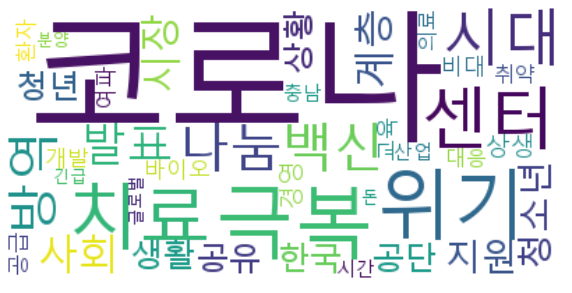

In [16]:
okt = Okt()
text20 = []
for i in range(int(len(news20))):
    noun = okt.nouns(news20[i])
    for j in noun:
        text20.append(j)
text20

#### 불용어 처리

#불용어 사전 만들기
stop_words = ["위","제","속","및","로","간", "비즈","첫","날","풀","더","명","비","등"]

#아까는 함수가 있었지만 이건 없으므로 반복문 돌려서 매칭해서 원본에 담을 수 있게 해야 함

text20 = [each_word for each_word in text20 if each_word not in stop_words]
print(len(text20))

#### 빈도수 처리(워드 카운팅)

#nltk : 빈도를 계산해서 정렬까지 시켜주는 

ko = nltk.Text(text20, name="코로나2020뉴스")
#이름 넣어야 되는데 아무거나 지정하면 됨

#dir(ko) >> 사용할 수 있는 함수 조회

data = ko.vocab().most_common(100)
#얘는 빈도를 비율로 나타낸건 아니고 실제 counting 수 확인
data
#data = data[:10]

### 워드 클라우드 출력
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=100, background_color = "white",max_words=40, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

#stopwords쓸수 없음
#그냥 generate쓸 수 없음
#generate_from_frequencies할 때 데이터는 dict형태로 넘겨줘야 함
#원래 형식이 tuple로 되어있음

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
#image를 불러올 때 WordCloud의 recolor함수 사용해서 색깔 불러오기
plt.axis("off")

In [37]:
data 

[('코로나', 47),
 ('극복', 9),
 ('시대', 7),
 ('지원', 6),
 ('포스트', 5),
 ('사회', 5),
 ('세계', 4),
 ('지속', 4),
 ('개발', 3),
 ('시선집중', 3),
 ('치료', 3),
 ('서비스', 3),
 ('블루', 3),
 ('온라인', 3),
 ('마인드', 3),
 ('소셜', 3),
 ('관리', 3),
 ('예방', 3),
 ('예술', 3),
 ('비즈', 2),
 ('스토리', 2),
 ('사태', 2),
 ('직원', 2),
 ('마음', 2),
 ('간', 2),
 ('혁신', 2),
 ('위기', 2),
 ('사랑', 2),
 ('헌혈', 2),
 ('산학', 2),
 ('위로', 2),
 ('위해', 2),
 ('센터', 2),
 ('재단', 2),
 ('대응', 2),
 ('녹십자', 2),
 ('혈장', 2),
 ('첫', 2),
 ('해결', 2),
 ('교육', 2),
 ('스테이', 2),
 ('날', 2),
 ('기념', 2),
 ('한전', 2),
 ('글로벌', 2),
 ('풀', 2),
 ('니스', 2),
 ('기반', 2),
 ('린지', 2),
 ('참여', 2),
 ('청소년', 2),
 ('명', 2),
 ('중', 2),
 ('공연', 2),
 ('언택트', 2),
 ('임', 2),
 ('활동', 2),
 ('피해', 2),
 ('긴급', 2),
 ('민주주의', 2),
 ('서울', 2),
 ('온', 2),
 ('처', 2),
 ('피아노', 2),
 ('디지털', 2),
 ('앤드', 2),
 ('자동차', 2),
 ('경영', 2),
 ('실적', 2),
 ('발표', 2),
 ('전국', 2),
 ('금천구', 2),
 ('시설', 2),
 ('공단', 2),
 ('행사', 2),
 ('진행', 2),
 ('클리', 2),
 ('장기', 1),
 ('건강', 1),
 ('비즈니스', 1),
 ('북스', 1),
 ('미래', 1),
 ('